In [1]:
import pandas as pd

bank_df = pd.read_csv('bank-prep.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
from sklearn.preprocessing import MinMaxScaler

bank_df = bank_df.drop('y', axis=1) # y는 범위변환 대상이 아니기 때문에 뺀다.

mc = MinMaxScaler()
mc.fit(bank_df) # MinMaxScaler를 사용해 범위변환용 파라미터를 계산한다.

bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns) # 범위변환의 결과를 데이터 프레임 형식으로 변환한다.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(bank_df) # StandardScaler를 사용해 Z변환용 파라미터를 계산한다.

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns) # Z변환 결과를 데이터 프레임 형식으로 변환한다.

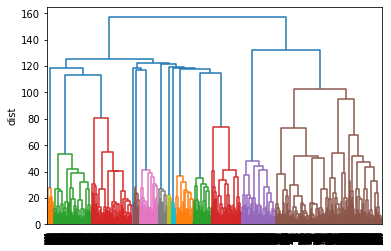

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt # 덴드로그램을 그리기 위한 plt

hcls = linkage(bank_df_sc, metric="euclidean", method="ward") # 계층형 클러스터링
dendrogram(hcls) # 덴드로그램 작성

plt.ylabel('dist') #덴드로그램 그림
plt.show()

In [5]:
from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 100, criterion='distance') # 거리 경계값을 100으로 잡고 데이터를 그룹으로 분할해 ID를 부여한다.
print(cst_group)

[14 14 14 ... 12 12 12]


In [6]:
from sklearn.cluster import KMeans

kcls = KMeans(n_clusters=10) # 클러스터 10개로 분할함
cst_group = kcls.fit_predict(bank_df_sc) # bank_df_sc에 대해 클러스터링 적용

print(cst_group)

[0 0 0 ... 2 2 2]


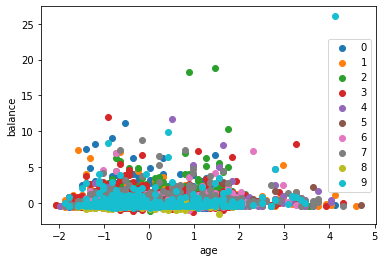

In [7]:
for i in range(10) :
    labels= bank_df_sc[cst_group==i]
    plt.scatter(labels['age'], labels['balance'], label=i)
    
plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [8]:
bank_df_sc['group'] = cst_group
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0


In [9]:
print(bank_df_sc['group'].value_counts())

0    1851
3    1598
7     897
2     631
1     569
6     456
9     426
4     308
8     128
5      69
Name: group, dtype: int64


In [10]:
bank_df_sc[bank_df_sc['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,1851.000000,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,...,1.851000e+03,1.851000e+03,1851.000000,1851.000000,1.851000e+03,1851.000000,1.851000e+03,1.851000e+03,1.851000e+03,1851.0
mean,-0.022353,-1.371485e-01,-0.048365,0.361206,-0.047200,0.005929,-0.027583,0.024161,-0.414335,-0.306632,...,-2.678184e-01,-1.674064e-01,-0.428819,0.753159,-1.002619e-01,0.753327,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
std,0.900858,2.942886e-15,0.810659,0.880126,0.955547,0.998600,0.983312,1.057887,0.105240,0.085486,...,8.051292e-15,3.276043e-15,0.127038,1.520160,2.165520e-15,1.035410,7.551557e-15,1.610258e-15,4.594789e-15,0.0
min,-1.774271,-1.371485e-01,-0.774887,-1.140627,-0.444540,-1.758049,-0.968244,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-1.002619e-01,-0.662104,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
25%,-0.728606,-1.371485e-01,-0.424185,-1.140627,-0.444540,-0.913382,-0.595519,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-1.002619e-01,-0.662104,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
50%,-0.158242,-1.371485e-01,-0.305218,0.876711,-0.444540,0.051953,-0.308520,-0.238367,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
75%,0.697303,-1.371485e-01,-0.002821,0.876711,-0.444540,0.655287,0.179750,0.097459,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,2.843677,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
max,4.119482,-1.371485e-01,11.094792,0.876711,2.249514,1.741289,11.566513,12.858852,3.648753,2.945362,...,-2.678184e-01,-1.674064e-01,2.300280,2.843677,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
